In [829]:
import warnings
warnings.filterwarnings('ignore')

In [830]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [831]:
cyclingdata = pd.read_csv("day.csv")

In [832]:
cyclingdata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [833]:
cyclingdata.nunique().sort_values() 
#Done to understand which variables are categorical, and which are continuous. 

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

In [834]:
cyclingdata.dtypes
#temp, atemp, and hum, and windspeed are continuous.
# yr, holiday, workingday, weatherit, season, weekday, mnth, are categorical.
#casual, registered, cnt, and instant are integers.
#dteday is in datetime object.

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [835]:
cyclingdata.drop(columns = ['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)
#Dropping columns not relevant for analysis

In [836]:
cyclingdata.dtypes 
#Checking to see columns have been dropped

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [837]:
cyclingdata['season'].value_counts()
#Will need to be dummified later, there are four levels

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [838]:
cyclingdata['yr'].value_counts()
# Already zero and one, so no dummies need to be created

1    365
0    365
Name: yr, dtype: int64

In [839]:
cyclingdata['mnth'].value_counts()
#Will need to be dummified later, there are 12 levels

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [840]:
cyclingdata['holiday'].value_counts()
# Already zero and one, so no dummies need to be created

0    709
1     21
Name: holiday, dtype: int64

In [841]:
cyclingdata['weekday'].value_counts()
#Will need to be dummified later, there are 7 levels

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

In [842]:
cyclingdata['workingday'].value_counts() 
# Already zero and one, so no dummies need to be created

1    499
0    231
Name: workingday, dtype: int64

In [843]:
cyclingdata['weathersit'].value_counts()
#Will need to be dummified later, there are 3 levels

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [844]:
cyclingdata.isnull().sum(axis = 0) 
#No missing vallues

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [845]:
cyclingdata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [846]:
cyclingdata['season'] = cyclingdata['season'].astype('object')
cyclingdata['mnth'] = cyclingdata['mnth'].astype('object')
cyclingdata['weekday'] = cyclingdata['weekday'].astype('object')
cyclingdata['weathersit'] = cyclingdata['weathersit'].astype('object')
#Converted to objects as they will be dummified later

In [847]:
cyclingdata.season= cyclingdata.season.replace(1, "Spring")
cyclingdata.season= cyclingdata.season.replace(2, "Summer")
cyclingdata.season= cyclingdata.season.replace(3, "Fall")
cyclingdata.season= cyclingdata.season.replace(4, "Winter")
cyclingdata.mnth= cyclingdata.mnth.replace(1, "January")
cyclingdata.mnth= cyclingdata.mnth.replace(2, "February")
cyclingdata.mnth= cyclingdata.mnth.replace(3, "March")
cyclingdata.mnth= cyclingdata.mnth.replace(4, "April")
cyclingdata.mnth= cyclingdata.mnth.replace(5, "May")
cyclingdata.mnth= cyclingdata.mnth.replace(6, "June")
cyclingdata.mnth= cyclingdata.mnth.replace(7, "July")
cyclingdata.mnth= cyclingdata.mnth.replace(8, "August")
cyclingdata.mnth= cyclingdata.mnth.replace(9, "September")
cyclingdata.mnth= cyclingdata.mnth.replace(10, "October")
cyclingdata.mnth= cyclingdata.mnth.replace(11, "November")
cyclingdata.mnth= cyclingdata.mnth.replace(12, "December")
cyclingdata.mnth= cyclingdata.mnth.replace(12, "December")
cyclingdata.weekday= cyclingdata.weekday.replace(0, "Sunday")
cyclingdata.weekday= cyclingdata.weekday.replace(1, "Monday")
cyclingdata.weekday= cyclingdata.weekday.replace(2, "Tuesday")
cyclingdata.weekday= cyclingdata.weekday.replace(3, "Wednesday")
cyclingdata.weekday= cyclingdata.weekday.replace(4, "Thursday")
cyclingdata.weekday= cyclingdata.weekday.replace(5, "Friday")
cyclingdata.weekday= cyclingdata.weekday.replace(6, "Saturday")
cyclingdata.weathersit= cyclingdata.weathersit.replace(1, "Clear")
cyclingdata.weathersit= cyclingdata.weathersit.replace(2, "Mist")
cyclingdata.weathersit= cyclingdata.weathersit.replace(3, "LightSnow")
#Replacing the encoded data with string values to help interpret results

In [848]:
cyclingdata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [849]:
cyclingdata.dtypes 
#Checking to see variable types have been changed

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

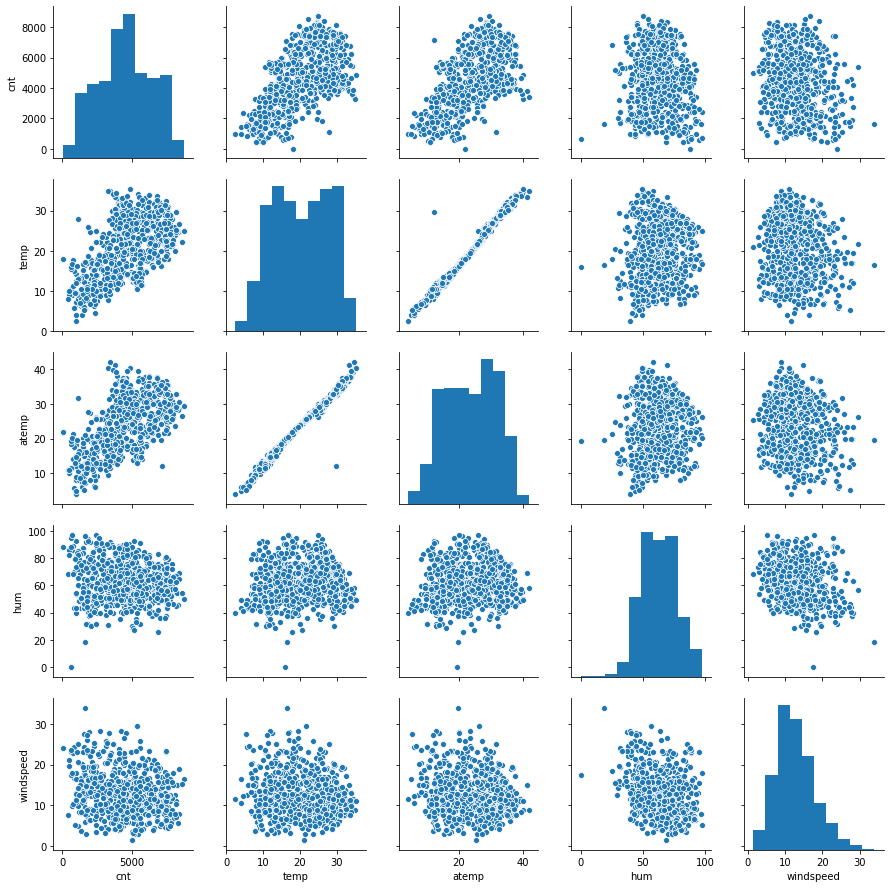

In [850]:
sns.pairplot(cyclingdata, vars=["cnt", "temp", 'atemp', 'hum', 'windspeed'])
plt.show()
#Checking to see relationships between the dependent variable cnt and other continuous predictor variables
#Some observations can be made here such as a positive association between cnt and temperature (temp and atemp).  

In [1]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = cyclingdata)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = cyclingdata)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = cyclingdata)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = cyclingdata)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = cyclingdata)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = cyclingdata)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = cyclingdata)
plt.show()

#Checking categorical variables and cnt using the boxplot
#cnt seems to be higher for season 2 and 3 (summer and fall)
#cnt seems to be higher in 2019
#cnt seems to be higher during months 5 to 10
# 25th and 50th percentile of cnt seems to be lower when it is a holiday (holiday = 1)
#cnt is lower when weathersit is 2 (mist + cloudy) and 3 (light snow, light rain)
# No major impact on cnt seen on weekday and workingday 

NameError: name 'plt' is not defined

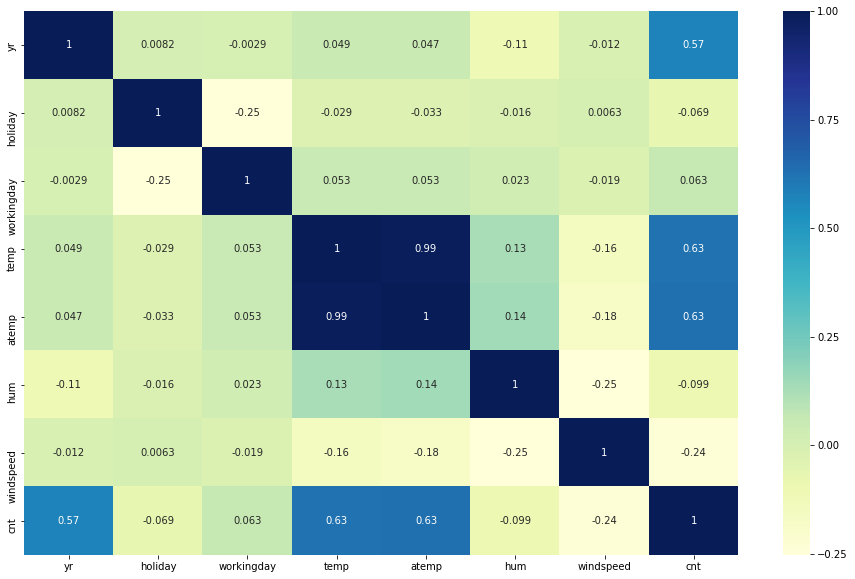

In [852]:
plt.figure(figsize = (16, 10))
sns.heatmap(cyclingdata.corr(), annot = True, cmap="YlGnBu")
plt.show()
#Checking correlations between the dependent variable cnt and other predictor variables
#cnt shows strong positive correlation with yr and temperature (temp and atemp)
#cnt shows weak negative correlation with windspeed
#holiday and workingday show weak negative correlation
#temp and atemp show high correlation as they are essentially the same variable
#windspeed and humidity show weak negative correlation

In [853]:
dummyseason = pd.get_dummies(cyclingdata['season'])

In [854]:
dummyseason.head()

,Fall,Spring,Summer,Winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [855]:
dummyseason = pd.get_dummies(cyclingdata['season'], drop_first = True)

In [856]:
dummyseason.head() #the column 1 is gone, so the drop_first method has worked properly

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [857]:
dummymonth = pd.get_dummies(cyclingdata['mnth'])
dummymonth = pd.get_dummies(cyclingdata['mnth'], drop_first = True)

In [858]:
dummymonth.head() #the column 1 is gone, so the drop_first method has worked properly

,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [859]:
dummyweekday = pd.get_dummies(cyclingdata['weekday'])
dummyweekday = pd.get_dummies(cyclingdata['weekday'], drop_first = True)

In [860]:
dummyweathersit = pd.get_dummies(cyclingdata['weathersit'])
dummyweathersit = pd.get_dummies(cyclingdata['weathersit'], drop_first = True)

In [861]:
cyclingdata = pd.concat([cyclingdata, dummyseason], axis = 1)

In [862]:
cyclingdata.drop(['season'], axis = 1, inplace = True)

In [863]:
cyclingdata.head() #appended dummyseason and removed the season column

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter
0,0,January,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,January,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [864]:
cyclingdata = pd.concat([cyclingdata, dummymonth], axis = 1)
cyclingdata.drop(['mnth'], axis = 1, inplace = True)

In [865]:
cyclingdata.head() #appended dummymonth, removed the mnth column

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,December,February,January,July,June,March,May,November,October,September
0,0,0,Saturday,0,Mist,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,0,Sunday,0,Mist,14.902598,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [866]:
cyclingdata = pd.concat([cyclingdata, dummyweekday], axis = 1)
cyclingdata.drop(['weekday'], axis = 1, inplace = True)
#appending dummyweekday and removing the weekday column

In [867]:
cyclingdata = pd.concat([cyclingdata, dummyweathersit], axis = 1)
cyclingdata.drop(['weathersit'], axis = 1, inplace = True)
#appending dummyweathersit and removing the weathersit column

In [868]:
cyclingdata.head() 
#final dataframe after concatenating dummy variable columns

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,LightSnow,Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [869]:
from sklearn.model_selection import train_test_split

In [870]:
df_train, df_test = train_test_split(cyclingdata, train_size = 0.7, test_size = 0.3, random_state = 100)

In [871]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [872]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt'] #Scaling all variables except the dummies and 0-1 type categorical variables
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [873]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,LightSnow,Mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1


In [874]:
df_train.describe() #All variables now show min as 0 and max as 1

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,LightSnow,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [875]:
y_train = df_train.pop('cnt')
X_train = df_train

In [876]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [877]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [878]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('August', False, 14),
 ('December', False, 3),
 ('February', False, 4),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 5),
 ('March', False, 10),
 ('May', False, 15),
 ('November', False, 2),
 ('October', False, 13),
 ('September', True, 1),
 ('Monday', False, 8),
 ('Saturday', True, 1),
 ('Sunday', False, 7),
 ('Thursday', False, 11),
 ('Tuesday', False, 9),
 ('Wednesday', False, 12),
 ('LightSnow', True, 1),
 ('Mist', True, 1)]

In [879]:
X_train.columns[~rfe.support_] 
#RFE support is showing that atemp, months August, December, February, June, March, May, November, October, Monday, Sunday, Thursday, Tuesday, and Wednesday are not as significant.

Index(['atemp', 'August', 'December', 'February', 'June', 'March', 'May',
       'November', 'October', 'Monday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

In [880]:
col = X_train.columns[rfe.support_] #Storing important variables as per RFE in col

In [881]:
X_train_rfe = X_train[col]

In [882]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [883]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [884]:
print(lm.summary())
#training data shows R2 score of 85% and adjusted R2 score of 84%.
#Also, all the 15 predictors have a low p - value of 0.05 or less, indicating that they are significant predictors.

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 27 Apr 2020   Prob (F-statistic):          2.31e-191
Time:                        05:10:27   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2510      0.036      6.949      0.0

In [885]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'Spring', 'Summer', 'Winter', 'January', 'July', 'September',
       'Saturday', 'LightSnow', 'Mist'],
      dtype='object')

In [886]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
#vif for constant (const) is extremely high, so dropping const and rebuilding the model.

,Features,VIF
0,const,84.59
7,Spring,5.08
4,temp,3.89
9,Winter,3.60
8,Summer,2.64
5,hum,1.92
3,workingday,1.88
13,Saturday,1.78
10,January,1.57
15,Mist,1.57


In [887]:
X_train_new = X_train_rfe.drop(["const"], axis = 1)

In [888]:
X_train_lm = sm.add_constant(X_train_new)

In [889]:
lm = sm.OLS(y_train,X_train_lm).fit() 

In [890]:
print(lm.summary())
#With const dropped, the R2 score remains steady, and all predictors remain significant

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 27 Apr 2020   Prob (F-statistic):          2.31e-191
Time:                        05:10:28   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2510      0.036      6.949      0.0

In [891]:
X_train_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'January', 'July', 'September', 'Saturday',
       'LightSnow', 'Mist'],
      dtype='object')

In [892]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
#hum still has a vif of above 5 which is unacceptable, so dropping hum and rebuilding the model

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,Spring,4.53
8,Winter,3.48
7,Summer,2.84
14,Mist,2.29
0,yr,2.09
12,Saturday,1.98


In [893]:
X_train_new2 = X_train_new.drop(["hum"], axis = 1)

In [894]:
X_train_lm = sm.add_constant(X_train_new2)

In [895]:
lm = sm.OLS(y_train,X_train_lm).fit() 

In [896]:
print(lm.summary())
# R2 score remains almost same even now, and all the predictors are significant.

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Mon, 27 Apr 2020   Prob (F-statistic):          7.33e-189
Time:                        05:10:29   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1737      0.031      5.525      0.0

In [897]:
X_train_new2.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'Spring', 'Summer',
       'Winter', 'January', 'July', 'September', 'Saturday', 'LightSnow',
       'Mist'],
      dtype='object')

In [898]:
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
#temp has a VIF of above 5, so discarding temp and rebuilding the model

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
5,Spring,3.08
6,Summer,2.33
0,yr,2.08
7,Winter,1.99
11,Saturday,1.97
8,January,1.62
9,July,1.59


In [899]:
X_train_new3 = X_train_new2.drop(["temp"], axis = 1)

In [900]:
X_train_lm = sm.add_constant(X_train_new3)

In [901]:
lm = sm.OLS(y_train,X_train_lm).fit() 

In [902]:
print(lm.summary())
#When temp is dropped the explanatory power of the model dips by about 6% to 78%, also July becomes highly insignificant, so dropping July to check VIF.

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     136.0
Date:                Mon, 27 Apr 2020   Prob (F-statistic):          4.04e-154
Time:                        05:10:30   Log-Likelihood:                 425.72
No. Observations:                 510   AIC:                            -823.4
Df Residuals:                     496   BIC:                            -764.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5448      0.020     27.136      0.0

In [903]:
X_train_new3.columns

Index(['yr', 'holiday', 'workingday', 'windspeed', 'Spring', 'Summer',
       'Winter', 'January', 'July', 'September', 'Saturday', 'LightSnow',
       'Mist'],
      dtype='object')

In [904]:
X_train_new3 = X_train_new3.drop(['July'], axis=1)

In [905]:
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
#All VIF values are now below 5 after July gets dropped.

,Features,VIF
3,windspeed,4.12
2,workingday,3.54
4,Spring,2.68
5,Summer,2.00
0,yr,1.89
6,Winter,1.78
9,Saturday,1.62
7,January,1.60
11,Mist,1.56
8,September,1.20


In [906]:
X_train_lm = sm.add_constant(X_train_new3)

In [907]:
lm = sm.OLS(y_train,X_train_lm).fit() 

In [908]:
print(lm.summary())
#Holiday becomes insignificant when July is dropped, so dropping holiday and rebuilding the model.

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     147.6
Date:                Mon, 27 Apr 2020   Prob (F-statistic):          3.62e-155
Time:                        05:10:30   Log-Likelihood:                 425.61
No. Observations:                 510   AIC:                            -825.2
Df Residuals:                     497   BIC:                            -770.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5409      0.018     29.669      0.0

In [909]:
X_train_new4 = X_train_new3.drop(["holiday"], axis = 1)

In [910]:
X_train_lm = sm.add_constant(X_train_new4)

In [911]:
lm = sm.OLS(y_train,X_train_lm).fit() 

In [912]:
print(lm.summary())
#This is the model which has all significant predictors, and a R2 score of around 78%.

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     160.0
Date:                Mon, 27 Apr 2020   Prob (F-statistic):          1.30e-155
Time:                        05:10:31   Log-Likelihood:                 424.03
No. Observations:                 510   AIC:                            -824.1
Df Residuals:                     498   BIC:                            -773.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5334      0.018     30.033      0.0

In [913]:
vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
#All variables have a VIF of below 5.

,Features,VIF
2,windspeed,4.04
1,workingday,3.29
3,Spring,2.65
4,Summer,1.99
0,yr,1.88
5,Winter,1.73
6,January,1.60
8,Saturday,1.56
10,Mist,1.56
7,September,1.18


In [914]:
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

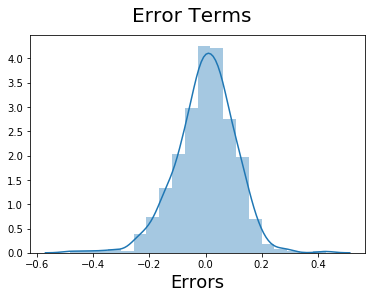

In [915]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)  
plt.xlabel('Errors', fontsize = 18)    
#Errors appear to be normally distributed and centred around 0 with around 1 standard deviation, indicating that multiple regression assumptions haven't been violated.

In [916]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [917]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,LightSnow,Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [918]:
y_test = df_test.pop('cnt')
X_test = df_test

In [919]:
X_test_m4 = sm.add_constant(X_test) #Dropping the variables so that the train and test sets have the same features
X_test_m4 = X_test_m4.drop(['atemp', 'August', 'December', 'February', 'June', 'March', 'May',
       'November', 'October', 'Monday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'hum', 'temp', 'July', 'holiday'], axis = 1)

In [920]:
X_test_m4.describe()
#Checking min and max. Some variables show differences from the train set.

,const,yr,workingday,windspeed,Spring,Summer,Winter,January,September,Saturday,LightSnow,Mist
count,219.0,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,1.0,0.479452,0.698630,0.313350,0.255708,0.264840,0.232877,0.077626,0.086758,0.118721,0.027397,0.319635
std,0.0,0.500722,0.459904,0.159947,0.437258,0.442259,0.423633,0.268194,0.282125,0.324202,0.163612,0.467403
min,1.0,0.000000,0.000000,-0.042808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.198517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.000000,1.000000,0.299459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,1.000000,1.000000,0.403048,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.0,1.000000,1.000000,0.807474,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [921]:
y_pred_m4 = lm.predict(X_test_m4)

Text(0, 0.5, 'y_pred')

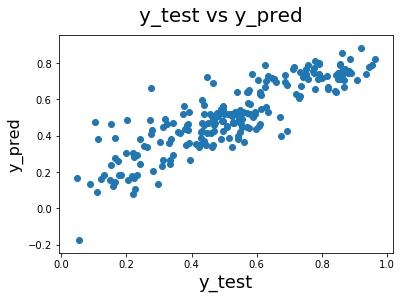

In [922]:
fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)         
plt.ylabel('y_pred', fontsize = 16)   

In [924]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m4)

0.7409269375982522

In [ ]:
#So the train had an R2 score of 78% while the test has a R2 score of around 74%.

Final model:
cnt = 0.5334 + yr * 0.2480 + workingday * 0.0567 + windspeed * (-0.1887) + Spring * (-0.2581) 
 + Summer *(-0.0406) + Winter * (-0.0729) + January * (-0.1031) + September * (0.0714) 
+ Saturday * (0.0650) + LightSnow (-0.3034) + Mist * (-0.0888)